In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [75]:
class kNN():
    def __init__(self, k = 3, exp = 2):
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        distance = distance**(1/self.exp)
        return distance
    
    def normalize(self, df):
        return (df - df.min()) / (df.max() - df.min())

    def getClassProbs(self, X_test):
        classes = self.Y_train.unique()
        arr = np.zeros((X_test.shape[0], len(classes)))
        class_prob = pd.DataFrame(arr, columns = classes)
        for i in range(len(X_test)):
            test_instance = X_test.iloc[i]
            distances = []
          
            for j in range(len(self.X_train)): 
                train_instance = self.X_train.iloc[j]
                distance = self.Minkowski_distance(test_instance, train_instance) 
                distances.append(distance)
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]

            prediction = self.Y_train[df_knn.index].value_counts()
            class_prob.loc[i,prediction.index] = prediction/self.k
        
        return class_prob
    
    def getPrediction(self, X_test):
        Y_pred = []
        for i in range(len(X_test)): 
            test_instance = X_test.iloc[i]
            
            distances = []
          
            for j in range(len(self.X_train)): 
                train_instance = self.X_train.iloc[j]
                distance = self.Minkowski_distance(test_instance, train_instance)
                distances.append(distance)
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            predictions = self.Y_train[df_knn.index].value_counts()
            y_pred = 0.
            for p in predictions.index:
                y_pred += predictions[p]*p
            Y_pred.append(y_pred/self.k)
        return pd.DataFrame({'prediction':Y_pred})



## Task b
### Data set 'glass.csv'
Normalization didn't improve the accuracy.

Text(0, 0.5, 'Accuracy')

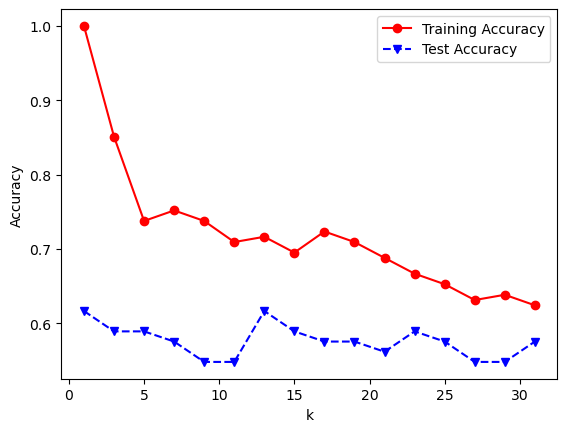

In [77]:
##################################################
#             Without normalization              #
##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

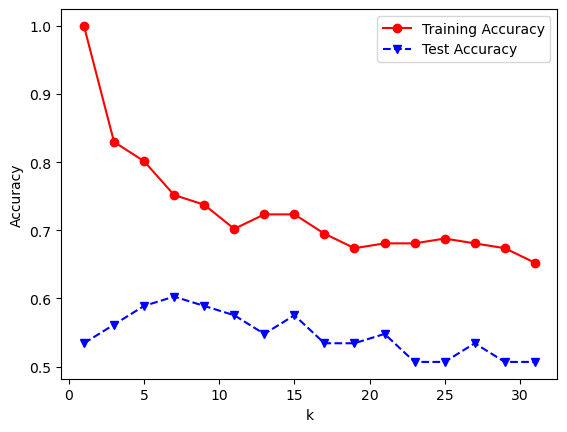

In [78]:
##################################################
#                With normalization              #
##################################################
# Hold-out testing: Training and Test set creation
##################################################

index = 0 
for k  in  k_range:
    clf = kNN(k)
    X_train = clf.normalize(X_train)
    X_test = clf.normalize(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

### Data set 'diabetes.csv'
Normalization improved accuracy of test set and made it stable.

Text(0, 0.5, 'Accuracy')

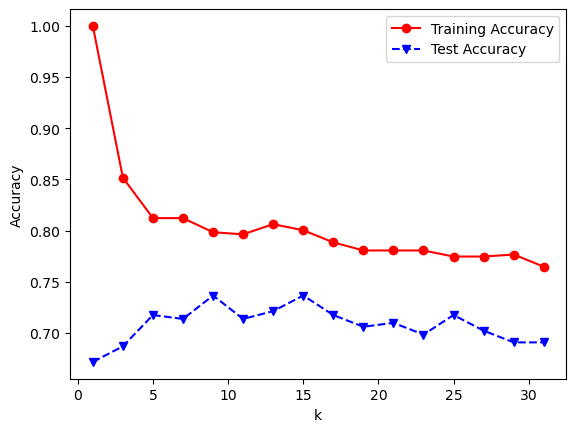

In [79]:
##################################################
#             Without normalization              #
##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

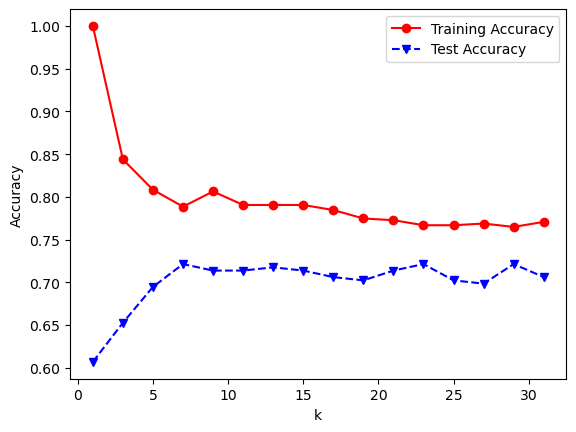

In [80]:
##################################################
#                With normalization              #
##################################################
# Hold-out testing: Training and Test set creation
##################################################

index = 0 
for k  in  k_range:
    clf = kNN(k)
    X_train = clf.normalize(X_train)
    X_test = clf.normalize(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

## Task c
columns: classes
rows: posterior class possibility of a instance

In [81]:
data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
clf = kNN()
clf.fit(X_train, Y_train)
print(clf.getClassProbs(X_test))

    'build wind float'  'build wind non-float'  headlamps  'vehic wind float'  \
0             0.666667                0.000000   0.000000            0.333333   
1             1.000000                0.000000   0.000000            0.000000   
2             0.000000                0.000000   0.666667            0.000000   
3             0.333333                0.666667   0.000000            0.000000   
4             1.000000                0.000000   0.000000            0.000000   
..                 ...                     ...        ...                 ...   
68            0.333333                0.000000   0.000000            0.666667   
69            0.000000                0.333333   0.333333            0.333333   
70            0.000000                0.333333   0.333333            0.000000   
71            0.000000                1.000000   0.000000            0.000000   
72            0.333333                0.666667   0.000000            0.000000   

    containers  tableware  

## Task d
### Without normalization

In [82]:
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
clf = kNN()
clf.fit(X_train, Y_train)
Y_pred = clf.getPrediction(X_test)
Y_pred

,prediction
0,5995.000000
1,7411.666667
2,27325.333333
3,6984.333333
4,11035.666667
5,15848.333333
6,10462.666667
7,5813.000000
8,11062.666667
9,9235.666667


In [83]:
mean_absolute_error(Y_test, Y_pred)

1513.418181818182

### With normalization

In [85]:
clf = kNN()
X_train = clf.normalize(X_train)
X_test = clf.normalize(X_test)
clf.fit(X_train, Y_train)
Y_pred = clf.getPrediction(X_test)
Y_pred

,prediction
0,6307.000000
1,6954.333333
2,27325.333333
3,6984.333333
4,11799.000000
5,14213.333333
6,11799.000000
7,5813.000000
8,8777.000000
9,9968.333333


In [86]:
mean_absolute_error(Y_test, Y_pred)

1942.812121212121